# Professional Hosts Analysis on Airbnb - Rio de Janeiro

## Otávio Marinho

This project aims to identify professional and regular hosts on Airbnb in the city of Rio de Janeiro, their trends, and differences.

- **Source:** [Inside Airbnb](https://insideairbnb.com/get-the-data/)
- **Period:** Up to one year prior to June 27, 2024.
- **License:** [Creative Commons BY 4.0](https://creativecommons.org/licenses/by/4.0/).

## Importing used Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting theme
sns.set_theme(style="darkgrid")


## Loading data

In [2]:
# Loading data
rio_listing = pd.read_csv('listings.csv', index_col=0)


## Verifying data size and empty columns

In [3]:
# Data Size
print(f"O dataset possui {rio_listing.shape[0]} linhas e {rio_listing.shape[1]} colunas.")

# Empty Columns
empty_columns = rio_listing.columns[rio_listing.isnull().all()].tolist()
print(f"Colunas vazias: {empty_columns}")

rio_listing = rio_listing.dropna(axis=1, how='all')


O dataset possui 34664 linhas e 17 colunas.
Colunas vazias: ['neighbourhood_group', 'license']


## Intial Data Visualization

In [4]:
print("Intial Data Visualization:")
rio_listing.head(5)


Intial Data Visualization:


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23
220377,Suíte Casal (banheiro privativo),1142424,Taciana,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1
25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23
35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36
223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17


## Distribution of Listings by Host

How are the hosts distributed based on the number of listings?

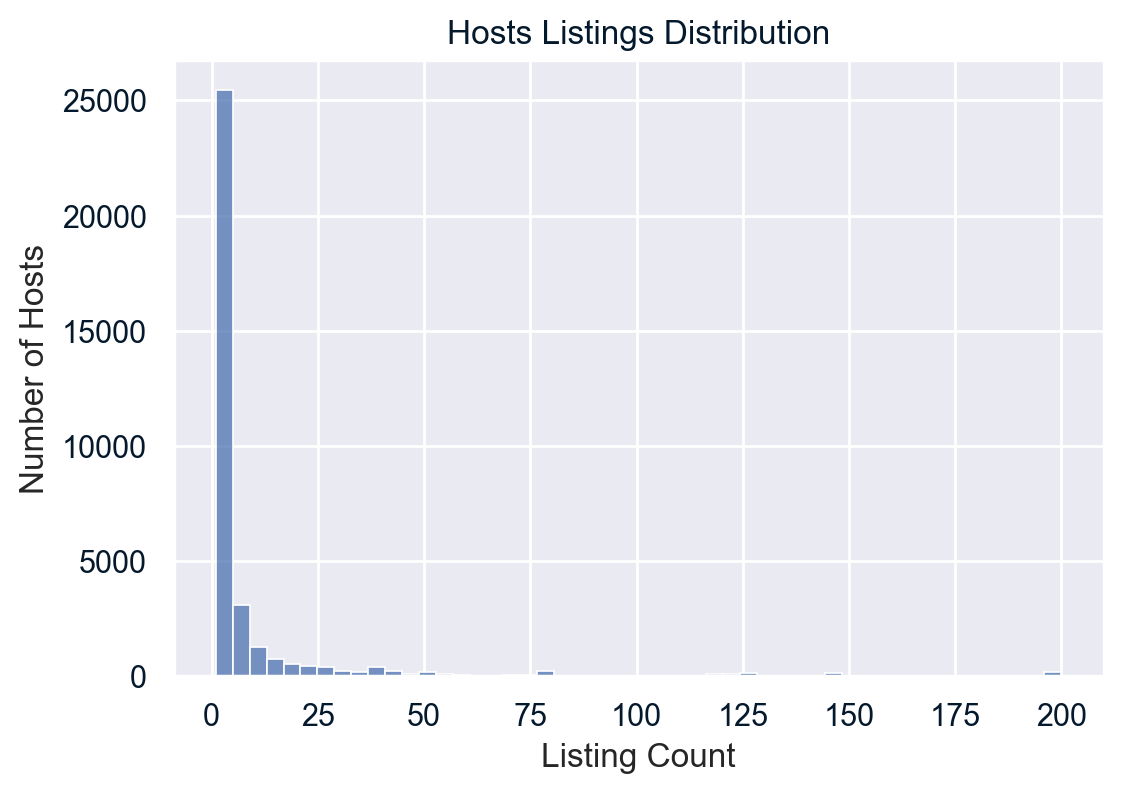

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(rio_listing['calculated_host_listings_count'], bins=50, kde=False, color='#4c72b0')
plt.title('Hosts Listings Distribution')
plt.xlabel('Listing Count')
plt.ylabel('Number of Hosts')
plt.show()


## Identifying Professional Hosts

In [6]:
# Determine the number of unique listings per host
host_listings_count = rio_listing.groupby('host_id')['calculated_host_listings_count'].max()

# Define the threshold for professional hosts (Above average)
threshold = host_listings_count.mean()

# Create a column indicating whether a host is professional
rio_listing['is_professional'] = rio_listing['host_id'].map(lambda x: host_listings_count[x] > threshold)

# Total of each type of host (count of unique hosts)
host_counts = rio_listing[['host_id', 'is_professional']].drop_duplicates().groupby('is_professional')['host_id'].count().reset_index(name='count')
print("Host count by type:")
print(host_counts)


Host count by type:
   is_professional  count
0            False  16091
1             True   4681


## Price difference between professional and regular hosts

How much do they charge on average?

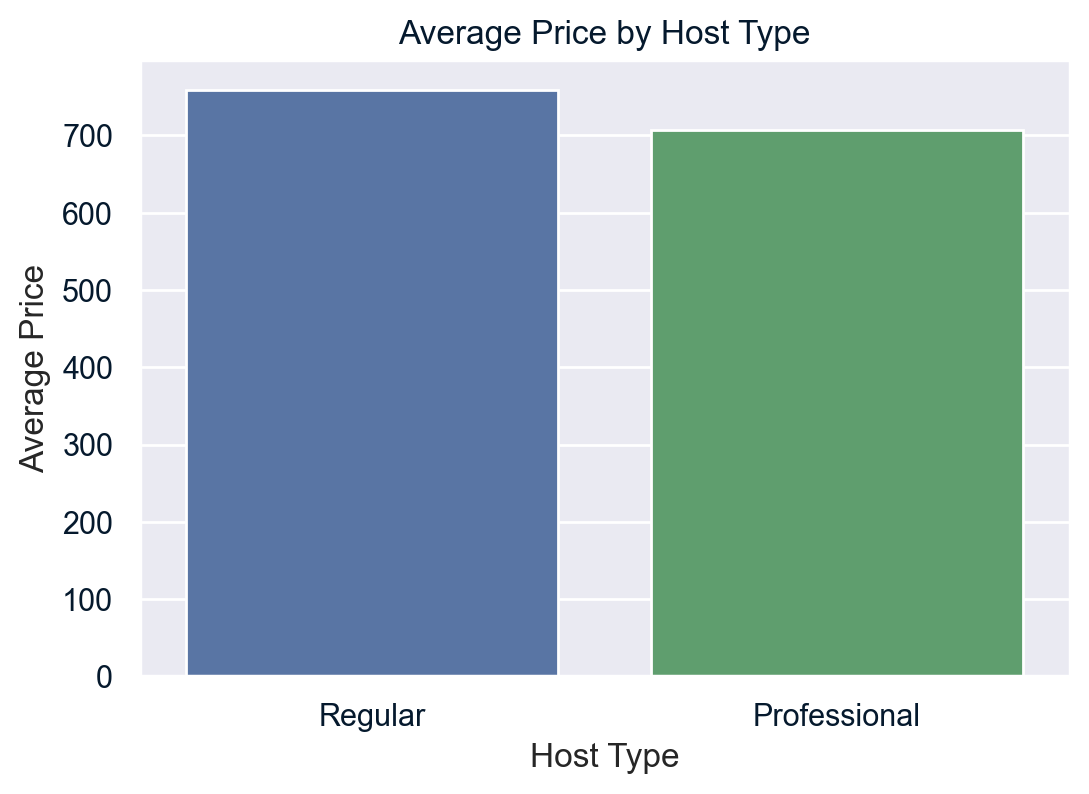

In [7]:
price_difference = rio_listing.groupby('is_professional')['price'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=price_difference, x='is_professional', y='price', palette=['#4c72b0', '#55a868'])
plt.xticks([0, 1], ['Regular', 'Professional'])
plt.xlabel('Host Type')
plt.ylabel('Average Price')
plt.title('Average Price by Host Type')
plt.show()


## Host distribution in popular neighbourhoods

How are the hosts distributed across the most popular neighborhoods?

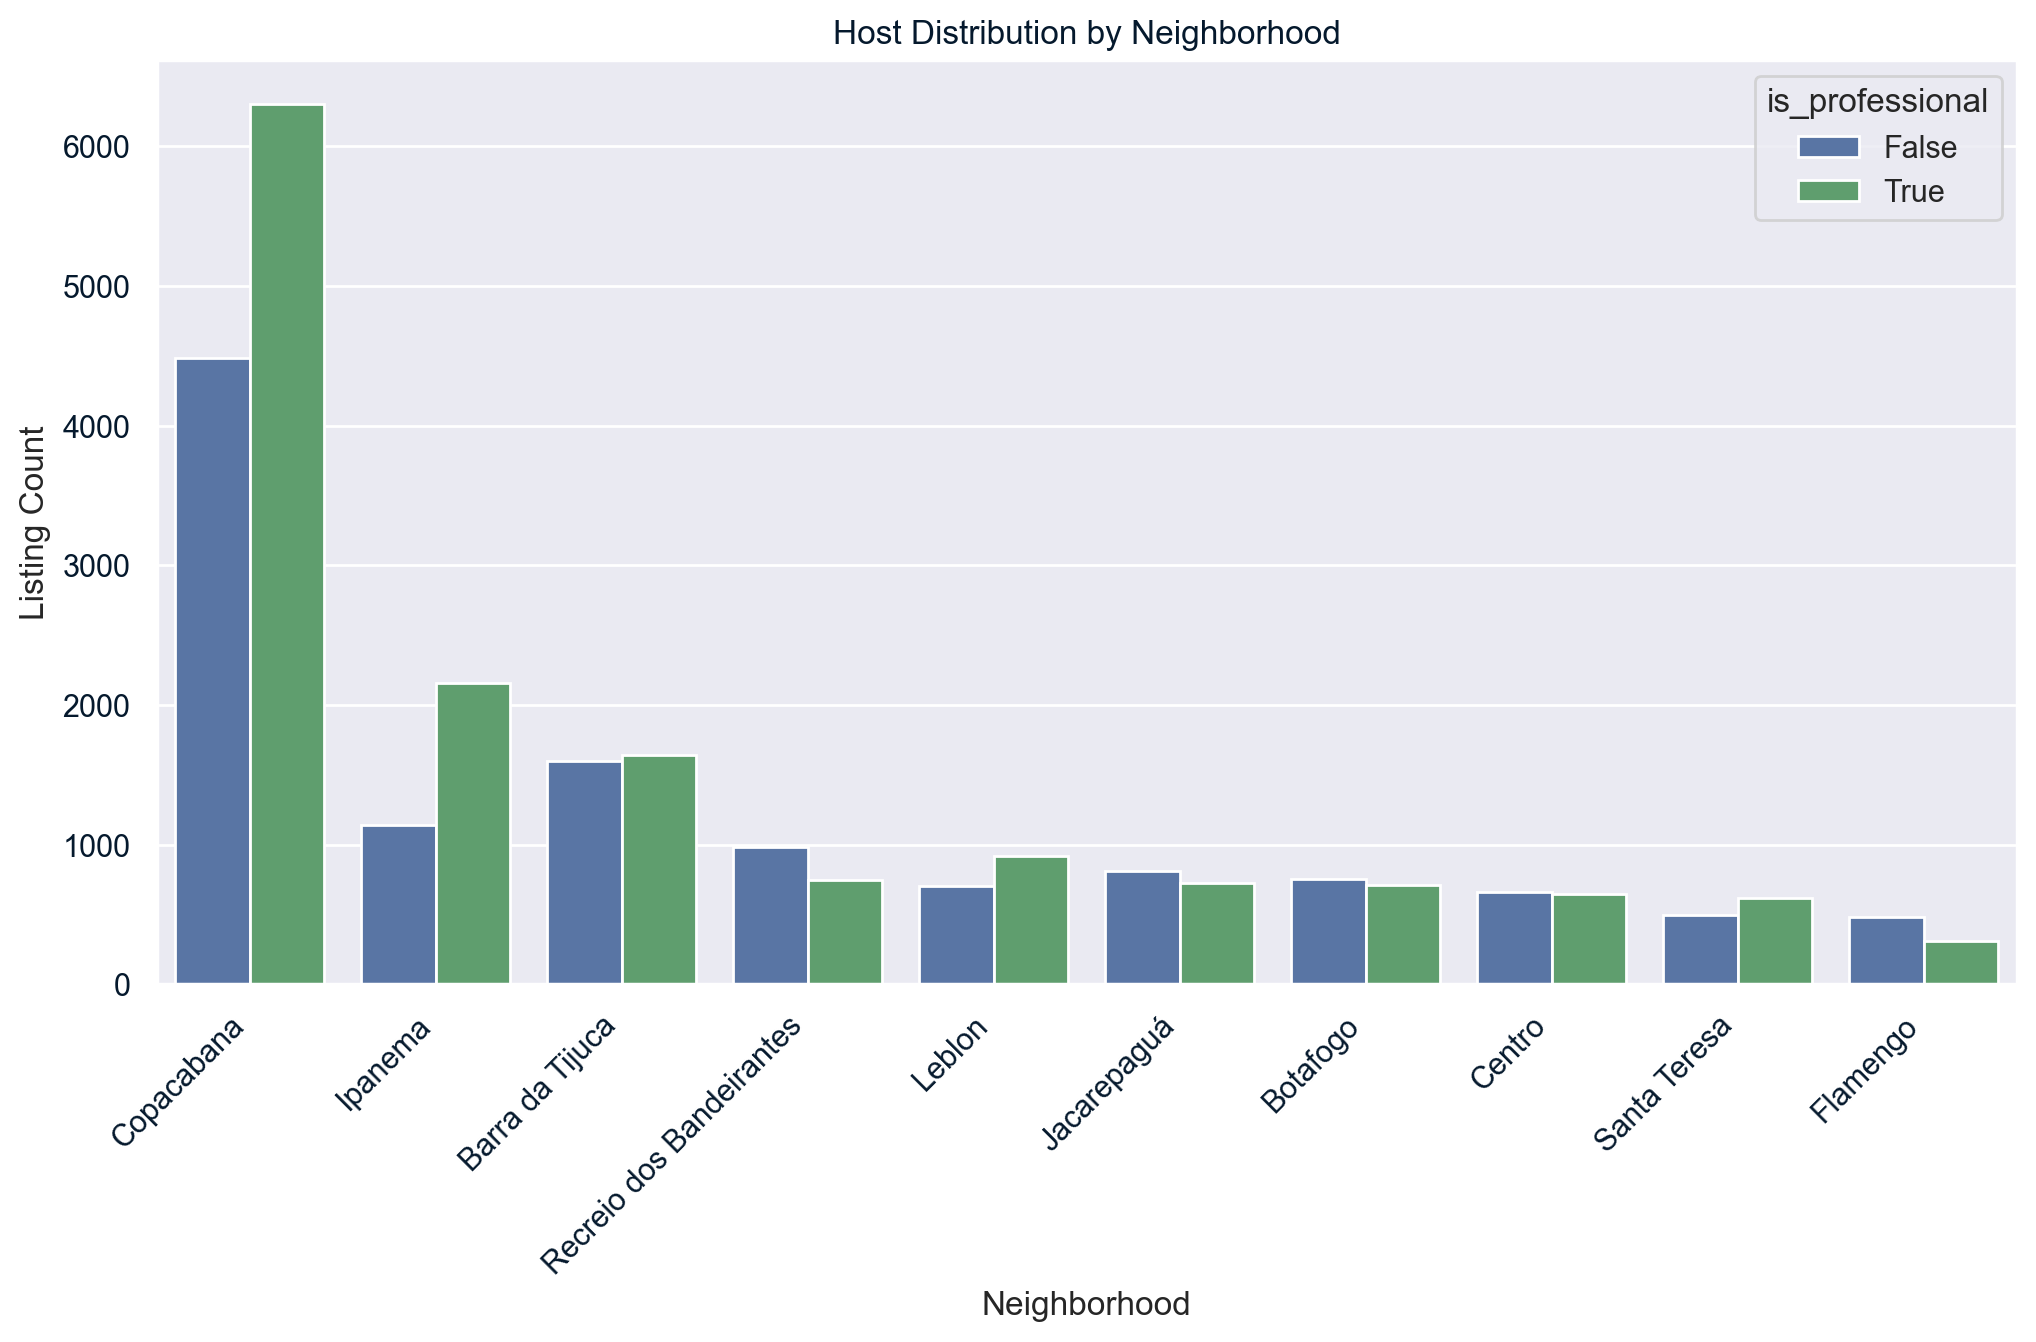

In [8]:
top_neighbourhoods = rio_listing['neighbourhood'].value_counts().head(10).index.tolist()
top_neighbourhoods_by_host = rio_listing[rio_listing['neighbourhood'].isin(top_neighbourhoods)]

counts_by_neighbourhood = top_neighbourhoods_by_host.groupby(['neighbourhood', 'is_professional']).size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts_by_neighbourhood, x='neighbourhood', y='count', hue='is_professional', palette=['#4c72b0', '#55a868'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Listing Count')
plt.title('Host Distribution by Neighborhood')
plt.show()


## Price Analysis Without Outliers in the Most Popular Neighborhoods

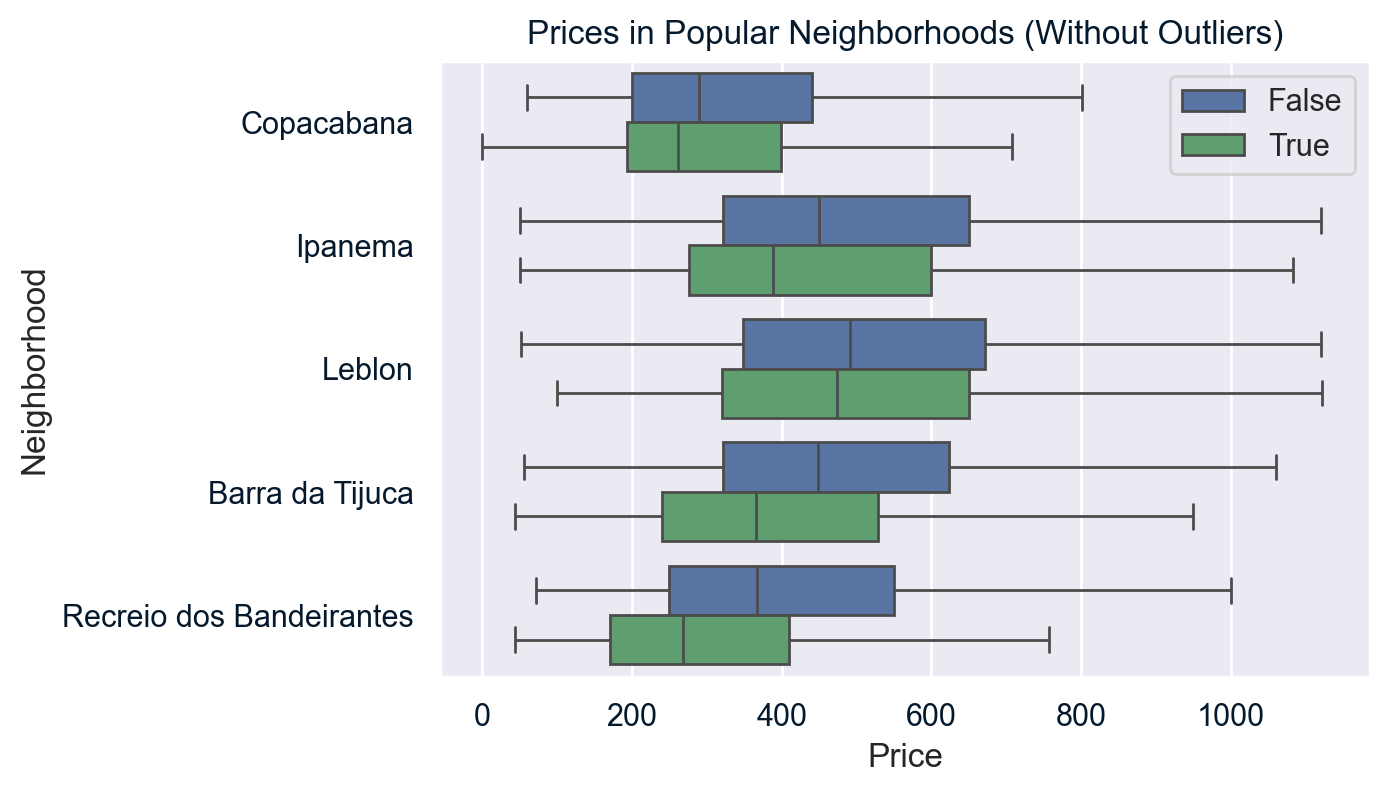

In [9]:
Q1 = rio_listing['price'].quantile(0.25)
Q3 = rio_listing['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

top_neighbourhoods2 = rio_listing['neighbourhood'].value_counts().head(5).index.tolist()
top_neighbourhoods_by_host2 = rio_listing[rio_listing['neighbourhood'].isin(top_neighbourhoods2)]

top_neighbourhoods_by_host_filter = top_neighbourhoods_by_host2[
    (top_neighbourhoods_by_host2['price'] >= lower_bound) & 
    (top_neighbourhoods_by_host2['price'] <= upper_bound)
]

plt.figure(figsize=(6, 4))
sns.boxplot(data=top_neighbourhoods_by_host_filter, x='price', y='neighbourhood', hue='is_professional', fliersize=0, palette=['#4c72b0', '#55a868'])
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Prices in Popular Neighborhoods (Without Outliers)')
plt.legend(loc='upper right')
plt.show()


### Based on the analysis, some key findings emerge about Airbnb hosts in Rio de Janeiro:

Professional hosts, who have many listings, dominate popular neighborhoods, suggesting a strong presence of real estate professionals in these areas.

Despite their predominance, professional hosts offer lower average prices compared to regular hosts. This could be a strategy to maintain competitiveness or due to economies of scale in operations.

In the most popular neighborhoods, the price variation is more balanced between professional and regular hosts when outliers are removed. This indicates that market conditions are relatively homogeneous in these areas.